This is for posterity so I know what I did wrong in the previous implementation of NMF tojeir.4comp 

In [1]:
import os
import numpy as np 
import scipy.interpolate as Interp
# --- provabgs --- 
from provabgs import models as Models

In [2]:
# --- plotting --- 
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False

In [3]:
test_theta = np.load('/Users/chahah/data/gqp_mc/speculator/DESI_complexdust.theta_test.npy')[:10000]
test_logspec = np.load('/Users/chahah/data/gqp_mc/speculator/DESI_complexdust.logspectrum_fsps_test.npy')[:10000]

fsps = Models.FSPS(name='nmf_bases')
Mdesi = Models.DESIspeculator()

# Rita had the files in descending lookback time order, which I thought meant
# it was cosmic time. So I flipped one of the arrays
# lets try reverting back to the old SFH interpolation.
fsps._sfh_basis = [
        Interp.InterpolatedUnivariateSpline(
                fsps._nmf_t_lb_sfh, 
                fsps._nmf_sfh_basis[i][::-1], k=1) 
            for i in range(fsps._Ncomp_sfh)
            ]

fsps._zh_basis = [
    Interp.InterpolatedUnivariateSpline(
                    fsps._nmf_t_lb_zh, 
                    fsps._nmf_zh_basis[i][::-1], k=1) 
    for i in range(fsps._Ncomp_zh)]

In [4]:
fsps._ssp_initiate()

/opt/anaconda3/envs/gqp/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in log10


(0.0, 7.254991200305219e-05)

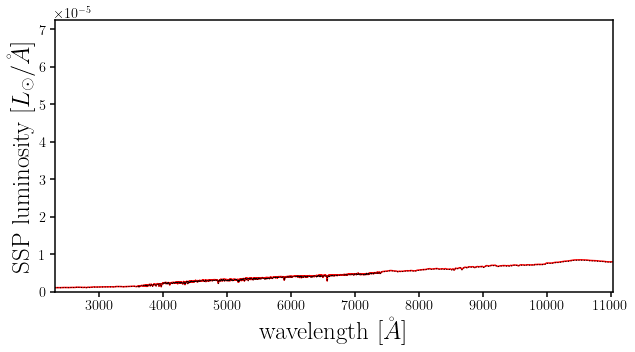

In [5]:
tt = test_theta[0]
tt_sfh = tt[:4]
tt_zh = tt[4:6]
tt_dust1 = tt[6]
tt_dust2 = tt[7]
tt_dust_index = tt[8]


_t = np.linspace(0, tt[-1], 50)
tages   = max(_t) - _t + 1e-8 

# Compute SFH and ZH
sfh = np.sum(np.array([
    tt_sfh[i] *
    fsps._sfh_basis[i](_t)/np.trapz(fsps._sfh_basis[i](_t), _t) 
    for i in range(4)]), 
    axis=0)
zh = np.sum(np.array([
    tt_zh[i] * fsps._zh_basis[i](_t) 
    for i in range(2)]), 
    axis=0)

for i, tage, m, z in zip(range(len(tages)), tages, sfh, zh): 
    if m <= 0 and i != 0: # no star formation in this bin 
        continue
    fsps._ssp.params['logzsol'] = np.log10(z/0.0190) # log(Z/Zsun)
    fsps._ssp.params['dust1'] = tt_dust1
    fsps._ssp.params['dust2'] = tt_dust2 
    fsps._ssp.params['dust_index'] = tt_dust_index

    wave_rest, lum_i = fsps._ssp.get_spectrum(tage=tage, peraa=True) # in units of Lsun/AA
    # note that this spectrum is normalized such that the total formed
    # mass = 1 Msun

    if i == 0: lum_ssp = np.zeros(len(wave_rest))
    lum_ssp += m * lum_i 

# the following normalization is to deal with the fact that
# fsps.get_spectrum is normalized so that formed_mass = 1 Msun
lum_ssp /= np.sum(sfh) 

fig = plt.figure(figsize=(10,5))
sub = fig.add_subplot(111)
sub.plot(wave_rest, lum_ssp, c='r')
sub.plot(Mdesi._emu_waves, np.exp(test_logspec[0]), c='k', ls=':', lw=1)
sub.set_xlabel('wavelength [$\AA$]', fontsize=25)
sub.set_xlim(Mdesi._emu_waves.min(), Mdesi._emu_waves.max())
sub.set_ylabel('SSP luminosity [$L_\odot/\AA$]', fontsize=25)
sub.set_ylim(0., None)

/opt/anaconda3/envs/gqp/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in log10


(0.0, 5.576222533449644e-05)

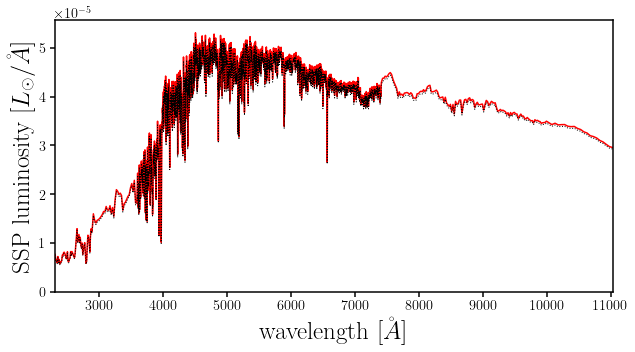

In [6]:
tt = test_theta[1]
tt_sfh = tt[:4]
tt_zh = tt[4:6]
tt_dust1 = tt[6]
tt_dust2 = tt[7]
tt_dust_index = tt[8]

_t = np.linspace(0, tt[-1], 50)
tages   = max(_t) - _t + 1e-8 

# Compute SFH and ZH
sfh = np.sum(np.array([
    tt_sfh[i] *
    fsps._sfh_basis[i](_t)/np.trapz(fsps._sfh_basis[i](_t), _t) 
    for i in range(4)]), 
    axis=0)
zh = np.sum(np.array([
    tt_zh[i] * fsps._zh_basis[i](_t) 
    for i in range(2)]), 
    axis=0)

for i, tage, m, z in zip(range(len(tages)), tages, sfh, zh): 
    if m <= 0 and i != 0: # no star formation in this bin 
        continue
    fsps._ssp.params['logzsol'] = np.log10(z/0.0190) # log(Z/Zsun)
    fsps._ssp.params['dust1'] = tt_dust1
    fsps._ssp.params['dust2'] = tt_dust2 
    fsps._ssp.params['dust_index'] = tt_dust_index

    wave_rest, lum_i = fsps._ssp.get_spectrum(tage=tage, peraa=True) # in units of Lsun/AA
    # note that this spectrum is normalized such that the total formed
    # mass = 1 Msun

    if i == 0: lum_ssp = np.zeros(len(wave_rest))
    lum_ssp += m * lum_i 

# the following normalization is to deal with the fact that
# fsps.get_spectrum is normalized so that formed_mass = 1 Msun
lum_ssp /= np.sum(sfh) 

fig = plt.figure(figsize=(10,5))
sub = fig.add_subplot(111)
sub.plot(wave_rest, lum_ssp, c='r')
sub.plot(Mdesi._emu_waves, np.exp(test_logspec[1]), c='k', ls=':', lw=1)
sub.set_xlabel('wavelength [$\AA$]', fontsize=25)
sub.set_xlim(Mdesi._emu_waves.min(), Mdesi._emu_waves.max())
sub.set_ylabel('SSP luminosity [$L_\odot/\AA$]', fontsize=25)
sub.set_ylim(0., None)